# Machine Learning Project for House Price Prediction

In [1]:
from prophet import Prophet
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import patches
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [2]:
# importing the models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [6]:
df["date"]=pd.to_datetime(df["date"])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [8]:
df.shape

(4600, 18)

In [9]:
df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [10]:
df.sample(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3018,2014-06-21,849000.0,4.0,2.00,2160,6300,1.5,0,1,4,2160,0,1928,0,4103 Hillcrest Ave SW,Seattle,WA 98116,USA
1140,2014-05-22,275000.0,1.0,0.75,1170,14149,1.0,0,0,5,880,290,1962,0,37316 W Lake Walker Dr SE,Enumclaw,WA 98022,USA
2283,2014-06-11,487028.0,2.0,1.50,1295,1093,2.0,0,0,3,1105,190,2007,0,2514 E Denny Way,Seattle,WA 98122,USA
688,2014-05-14,223000.0,3.0,1.75,1340,7473,1.0,0,0,4,1340,0,1973,0,16 R Pl NE,Auburn,WA 98002,USA
1902,2014-06-04,365000.0,2.0,1.00,1250,8100,1.0,0,0,4,1250,0,1947,1988,13727 1st Ave NE,Seattle,WA 98125,USA


In [11]:
df.rename(columns={"yr_built":"year_built"},inplace=True)

In [12]:
df.head(3)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,year_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.0,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA


In [13]:
df.groupby(by=["date"]).mean()

C:\Users\skss\AppData\Local\Temp\ipykernel_5592\181724155.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(by=["date"]).mean()


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,year_built,yr_renovated
date,,,,,,,,,,,,,
2014-05-02,525538.475480,3.402985,2.138060,2102.835821,15640.477612,1.462687,0.000000,0.223881,3.447761,1819.850746,282.985075,1972.850746,891.208955
2014-05-03,466970.000000,3.000000,1.812500,1620.000000,8901.000000,1.250000,0.000000,0.000000,3.500000,1490.000000,130.000000,1978.750000,478.000000
2014-05-04,576690.000000,3.200000,2.400000,2508.000000,7563.000000,1.400000,0.000000,0.400000,3.400000,1878.000000,630.000000,1972.400000,1203.400000
2014-05-05,586067.724206,3.523810,2.193452,2257.845238,17966.309524,1.565476,0.000000,0.202381,3.440476,1887.607143,370.238095,1972.857143,806.428571
2014-05-06,517471.196787,3.493976,2.171687,2102.168675,12127.662651,1.457831,0.000000,0.120482,3.349398,1769.638554,332.530120,1969.108434,891.228916
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-07-06,709930.000000,3.000000,2.000000,2210.000000,5440.000000,1.166667,0.000000,1.333333,3.666667,1530.000000,680.000000,1948.000000,1334.333333
2014-07-07,527370.791165,3.301205,2.066265,2053.819277,16340.481928,1.620482,0.000000,0.144578,3.530120,1825.686747,228.132530,1968.734940,625.843373
2014-07-08,540899.275826,3.299213,2.200787,2225.692913,15754.590551,1.515748,0.015748,0.228346,3.346457,1932.149606,293.543307,1974.433071,752.236220


In [14]:
np.where(df.isna()==True)

(array([], dtype=int64), array([], dtype=int64))

In [15]:
df["city"].unique()

array(['Shoreline', 'Seattle', 'Kent', 'Bellevue', 'Redmond',
       'Maple Valley', 'North Bend', 'Lake Forest Park', 'Sammamish',
       'Auburn', 'Des Moines', 'Bothell', 'Federal Way', 'Kirkland',
       'Issaquah', 'Woodinville', 'Normandy Park', 'Fall City', 'Renton',
       'Carnation', 'Snoqualmie', 'Duvall', 'Burien', 'Covington',
       'Inglewood-Finn Hill', 'Kenmore', 'Newcastle', 'Mercer Island',
       'Black Diamond', 'Ravensdale', 'Clyde Hill', 'Algona', 'Skykomish',
       'Tukwila', 'Vashon', 'Yarrow Point', 'SeaTac', 'Medina',
       'Enumclaw', 'Snoqualmie Pass', 'Pacific', 'Beaux Arts Village',
       'Preston', 'Milton'], dtype=object)

In [16]:
city_counts=df['city'].value_counts()

In [17]:
city_counts

Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific             

In [18]:
dfdum=pd.get_dummies(df,columns=["city"],drop_first=True)

In [19]:
dfdum

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,city_SeaTac,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point
0,2014-05-02,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,...,0,0,1,0,0,0,0,0,0,0
1,2014-05-02,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,...,0,1,0,0,0,0,0,0,0,0
2,2014-05-02,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,2014-05-02,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
4,2014-05-02,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,...,0,1,0,0,0,0,0,0,0,0
4596,2014-07-09,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4597,2014-07-09,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
4598,2014-07-10,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,...,0,1,0,0,0,0,0,0,0,0


In [20]:
cor=df.corr()

C:\Users\skss\AppData\Local\Temp\ipykernel_5592\960497222.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=df.corr()


In [21]:
cor.style.background_gradient()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,year_built,yr_renovated
price,1.000000,0.200336,0.327110,0.430410,0.050451,0.151461,0.135648,0.228504,0.034915,0.367570,0.210427,0.021857,-0.028774
bedrooms,0.200336,1.000000,0.545920,0.594884,0.068819,0.177895,-0.003483,0.111028,0.025080,0.484705,0.334165,0.142461,-0.061082
bathrooms,0.327110,0.545920,1.000000,0.761154,0.107837,0.486428,0.076232,0.211960,-0.119994,0.689918,0.298020,0.463498,-0.215886
sqft_living,0.430410,0.594884,0.761154,1.000000,0.210538,0.344850,0.117616,0.311009,-0.062826,0.876443,0.447206,0.287775,-0.122817
sqft_lot,0.050451,0.068819,0.107837,0.210538,1.000000,0.003750,0.017241,0.073907,0.000558,0.216455,0.034842,0.050706,-0.022730
floors,0.151461,0.177895,0.486428,0.344850,0.003750,1.000000,0.022024,0.031211,-0.275013,0.522814,-0.255510,0.467481,-0.233996
waterfront,0.135648,-0.003483,0.076232,0.117616,0.017241,0.022024,1.000000,0.360935,0.000352,0.078911,0.097501,-0.023563,0.008625
view,0.228504,0.111028,0.211960,0.311009,0.073907,0.031211,0.360935,1.000000,0.063077,0.174327,0.321602,-0.064465,0.022967
condition,0.034915,0.025080,-0.119994,-0.062826,0.000558,-0.275013,0.000352,0.063077,1.000000,-0.178196,0.200632,-0.399698,-0.186818
sqft_above,0.367570,0.484705,0.689918,0.876443,0.216455,0.522814,0.078911,0.174327,-0.178196,1.000000,-0.038723,0.408535,-0.160426


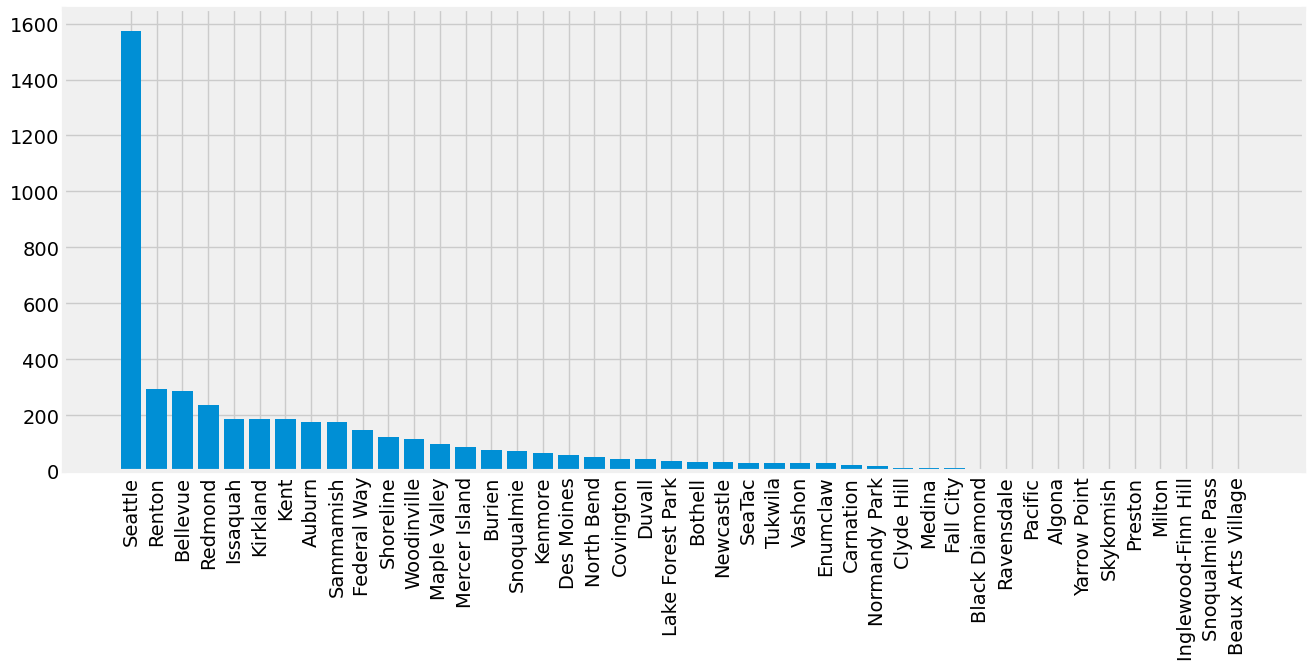

In [22]:
plt.figure(figsize=(16,6))
plt.style.use("fivethirtyeight")
plt.bar(city_counts.index,city_counts.values)
plt.xticks(rotation=90)
plt.show()

In [23]:
city10=city_counts[0:10]

In [24]:
city10

Seattle        1573
Renton          293
Bellevue        286
Redmond         235
Issaquah        187
Kirkland        187
Kent            185
Auburn          176
Sammamish       175
Federal Way     148
Name: city, dtype: int64

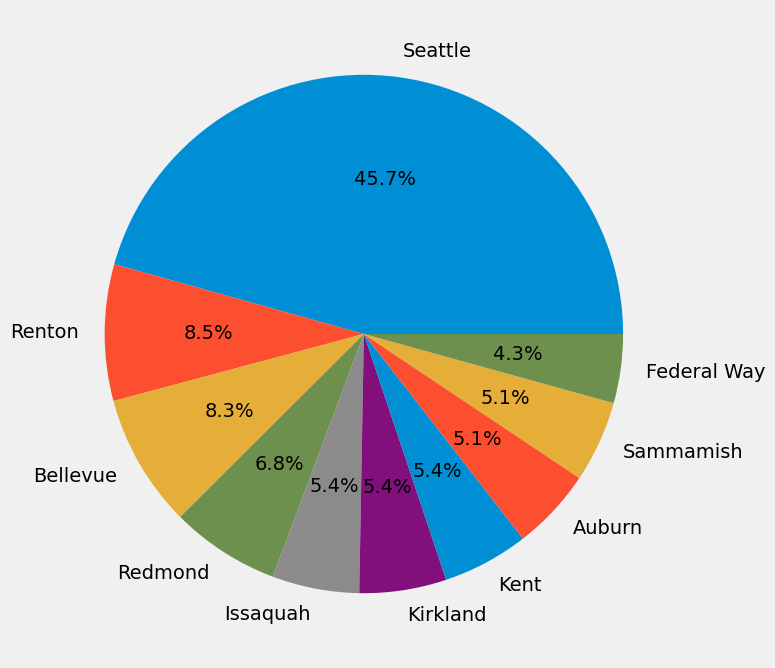

In [25]:
plt.figure(figsize=(8,8),edgecolor="white")
plt.style.use("fivethirtyeight")
plt.pie(city10.values,labels=city10.index,autopct="%1.1f%%")
plt.show()

In [26]:
def pie(column):
    data=df[column].value_counts()
    plt.figure(figsize=(6,6))
    plt.style.use("fivethirtyeight")
    plt.pie(data.values,labels=data.index,autopct="%1.1f%%")
    plt.title(column)
    plt.show()

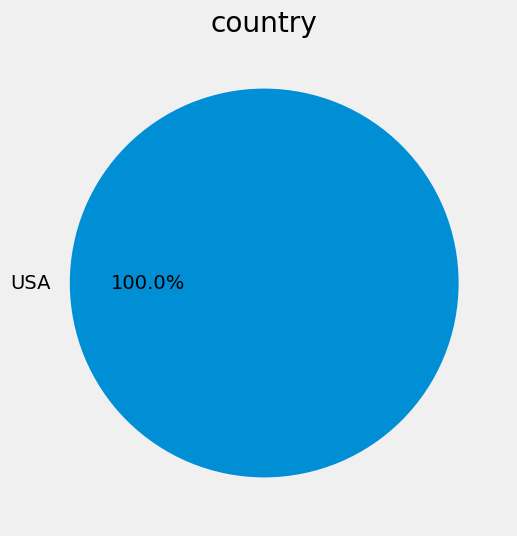

In [27]:
pie("country")

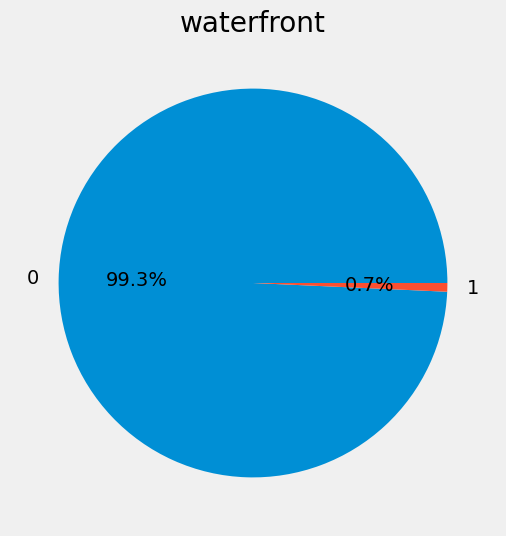

In [28]:
pie("waterfront")

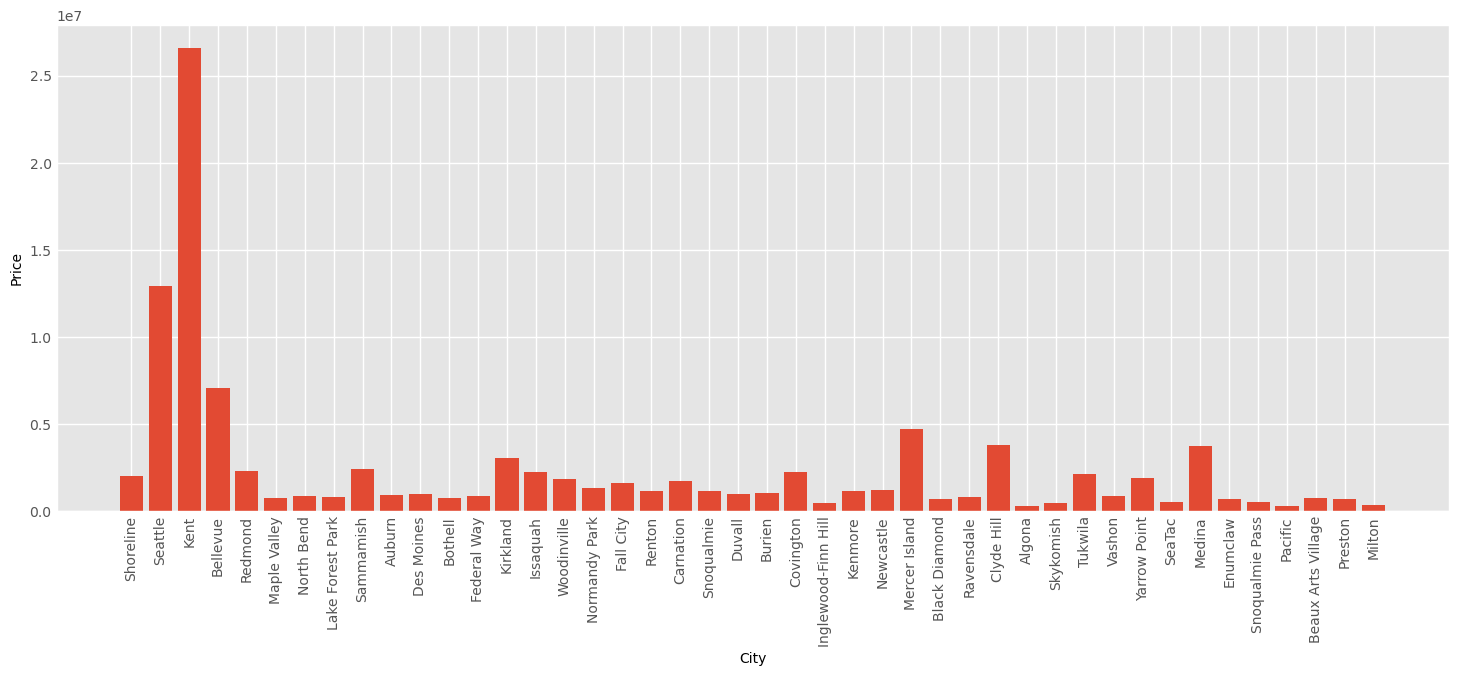

In [29]:
plt.style.use("ggplot")
plt.figure(figsize=(16,6))
plt.bar(df["city"],df["price"])
plt.xlabel("City")
plt.ylabel("Price") 
plt.xticks(rotation=90)
plt.show()

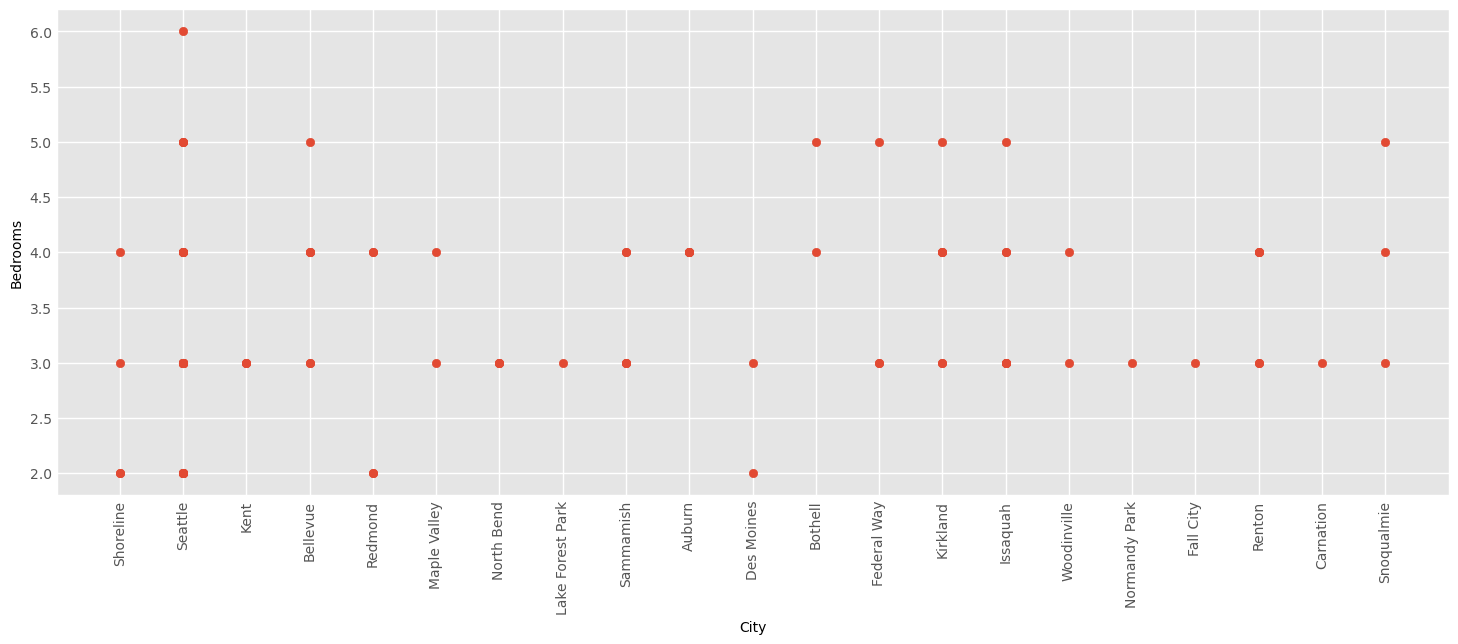

In [30]:
plt.figure(figsize=(16,6))
plt.scatter(df["city"].iloc[0:100],df["bedrooms"].iloc[0:100])
plt.xlabel("City")
plt.ylabel("Bedrooms")
plt.xticks(rotation=90)
plt.show()

In [31]:
bedrooms_counts=df["bedrooms"].value_counts()

In [32]:
bedrooms_counts

3.0    2032
4.0    1531
2.0     566
5.0     353
6.0      61
1.0      38
7.0      14
8.0       2
0.0       2
9.0       1
Name: bedrooms, dtype: int64

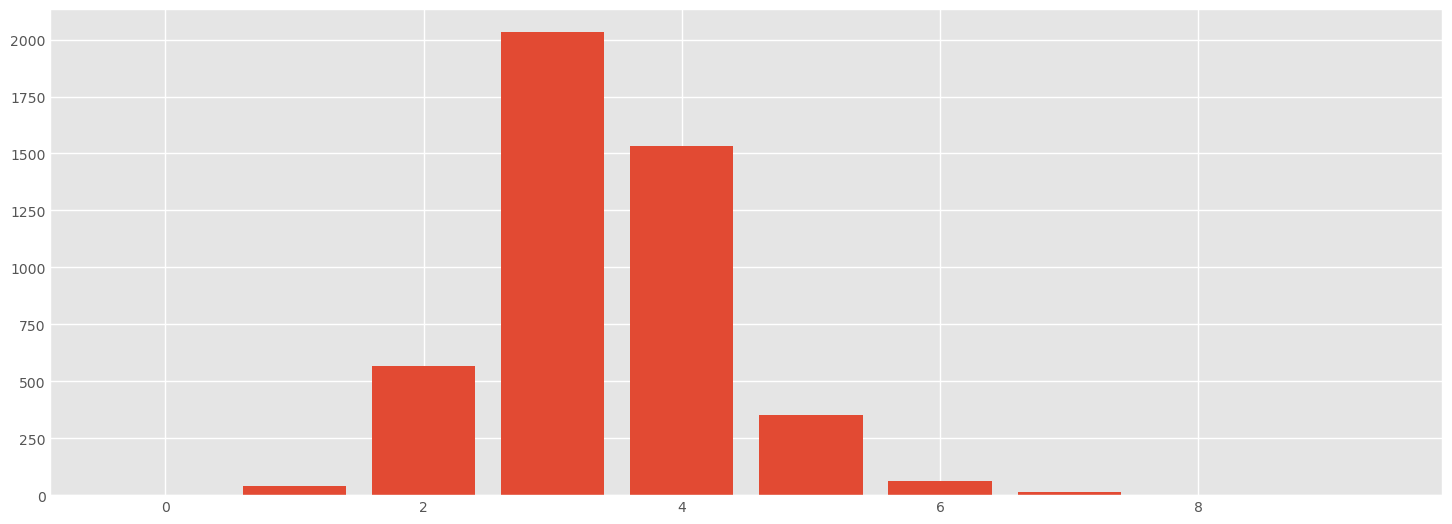

In [33]:
plt.figure(figsize=(16,6))
plt.style.use("ggplot")
plt.bar(bedrooms_counts.index,bedrooms_counts.values)
plt.show()

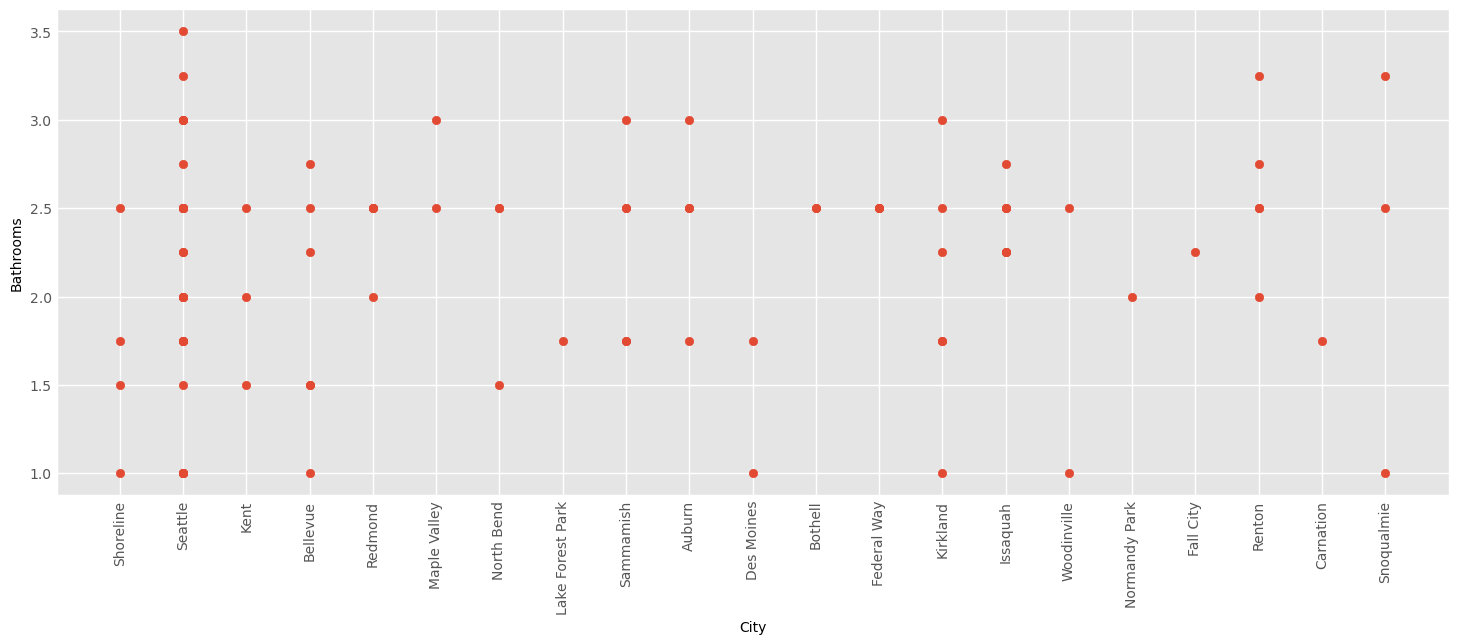

In [34]:
plt.figure(figsize=(16,6))
plt.scatter(df["city"].iloc[0:100],df["bathrooms"].iloc[0:100])
plt.xlabel("City")
plt.ylabel("Bathrooms")
plt.xticks(rotation=90)
plt.show()

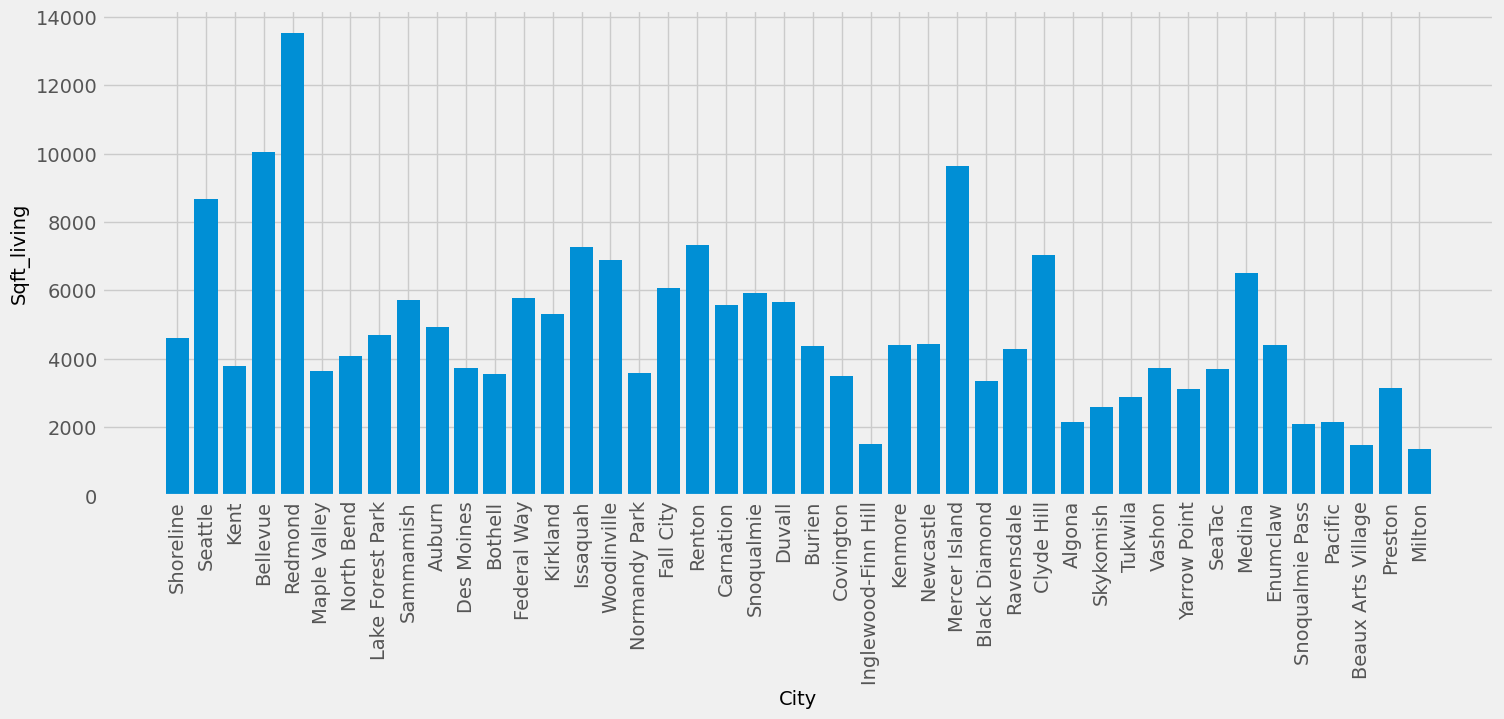

In [35]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,6))
plt.bar(df["city"],df["sqft_living"])
plt.xlabel("City")
plt.ylabel("Sqft_living") 
plt.xticks(rotation=90)
plt.show()

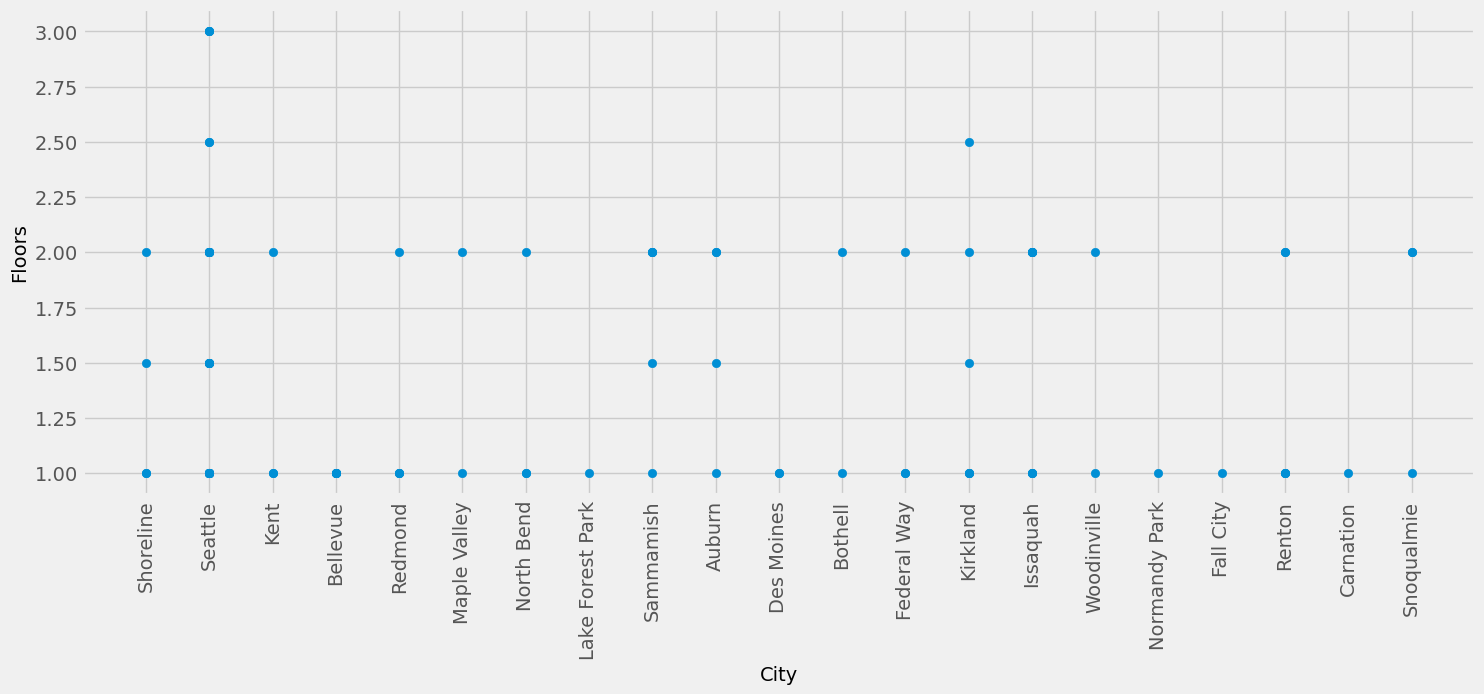

In [36]:
plt.figure(figsize=(16,6))
plt.scatter(df["city"].iloc[0:100],df["floors"].iloc[0:100])
plt.xlabel("City")
plt.ylabel("Floors")
plt.xticks(rotation=90)
plt.show()

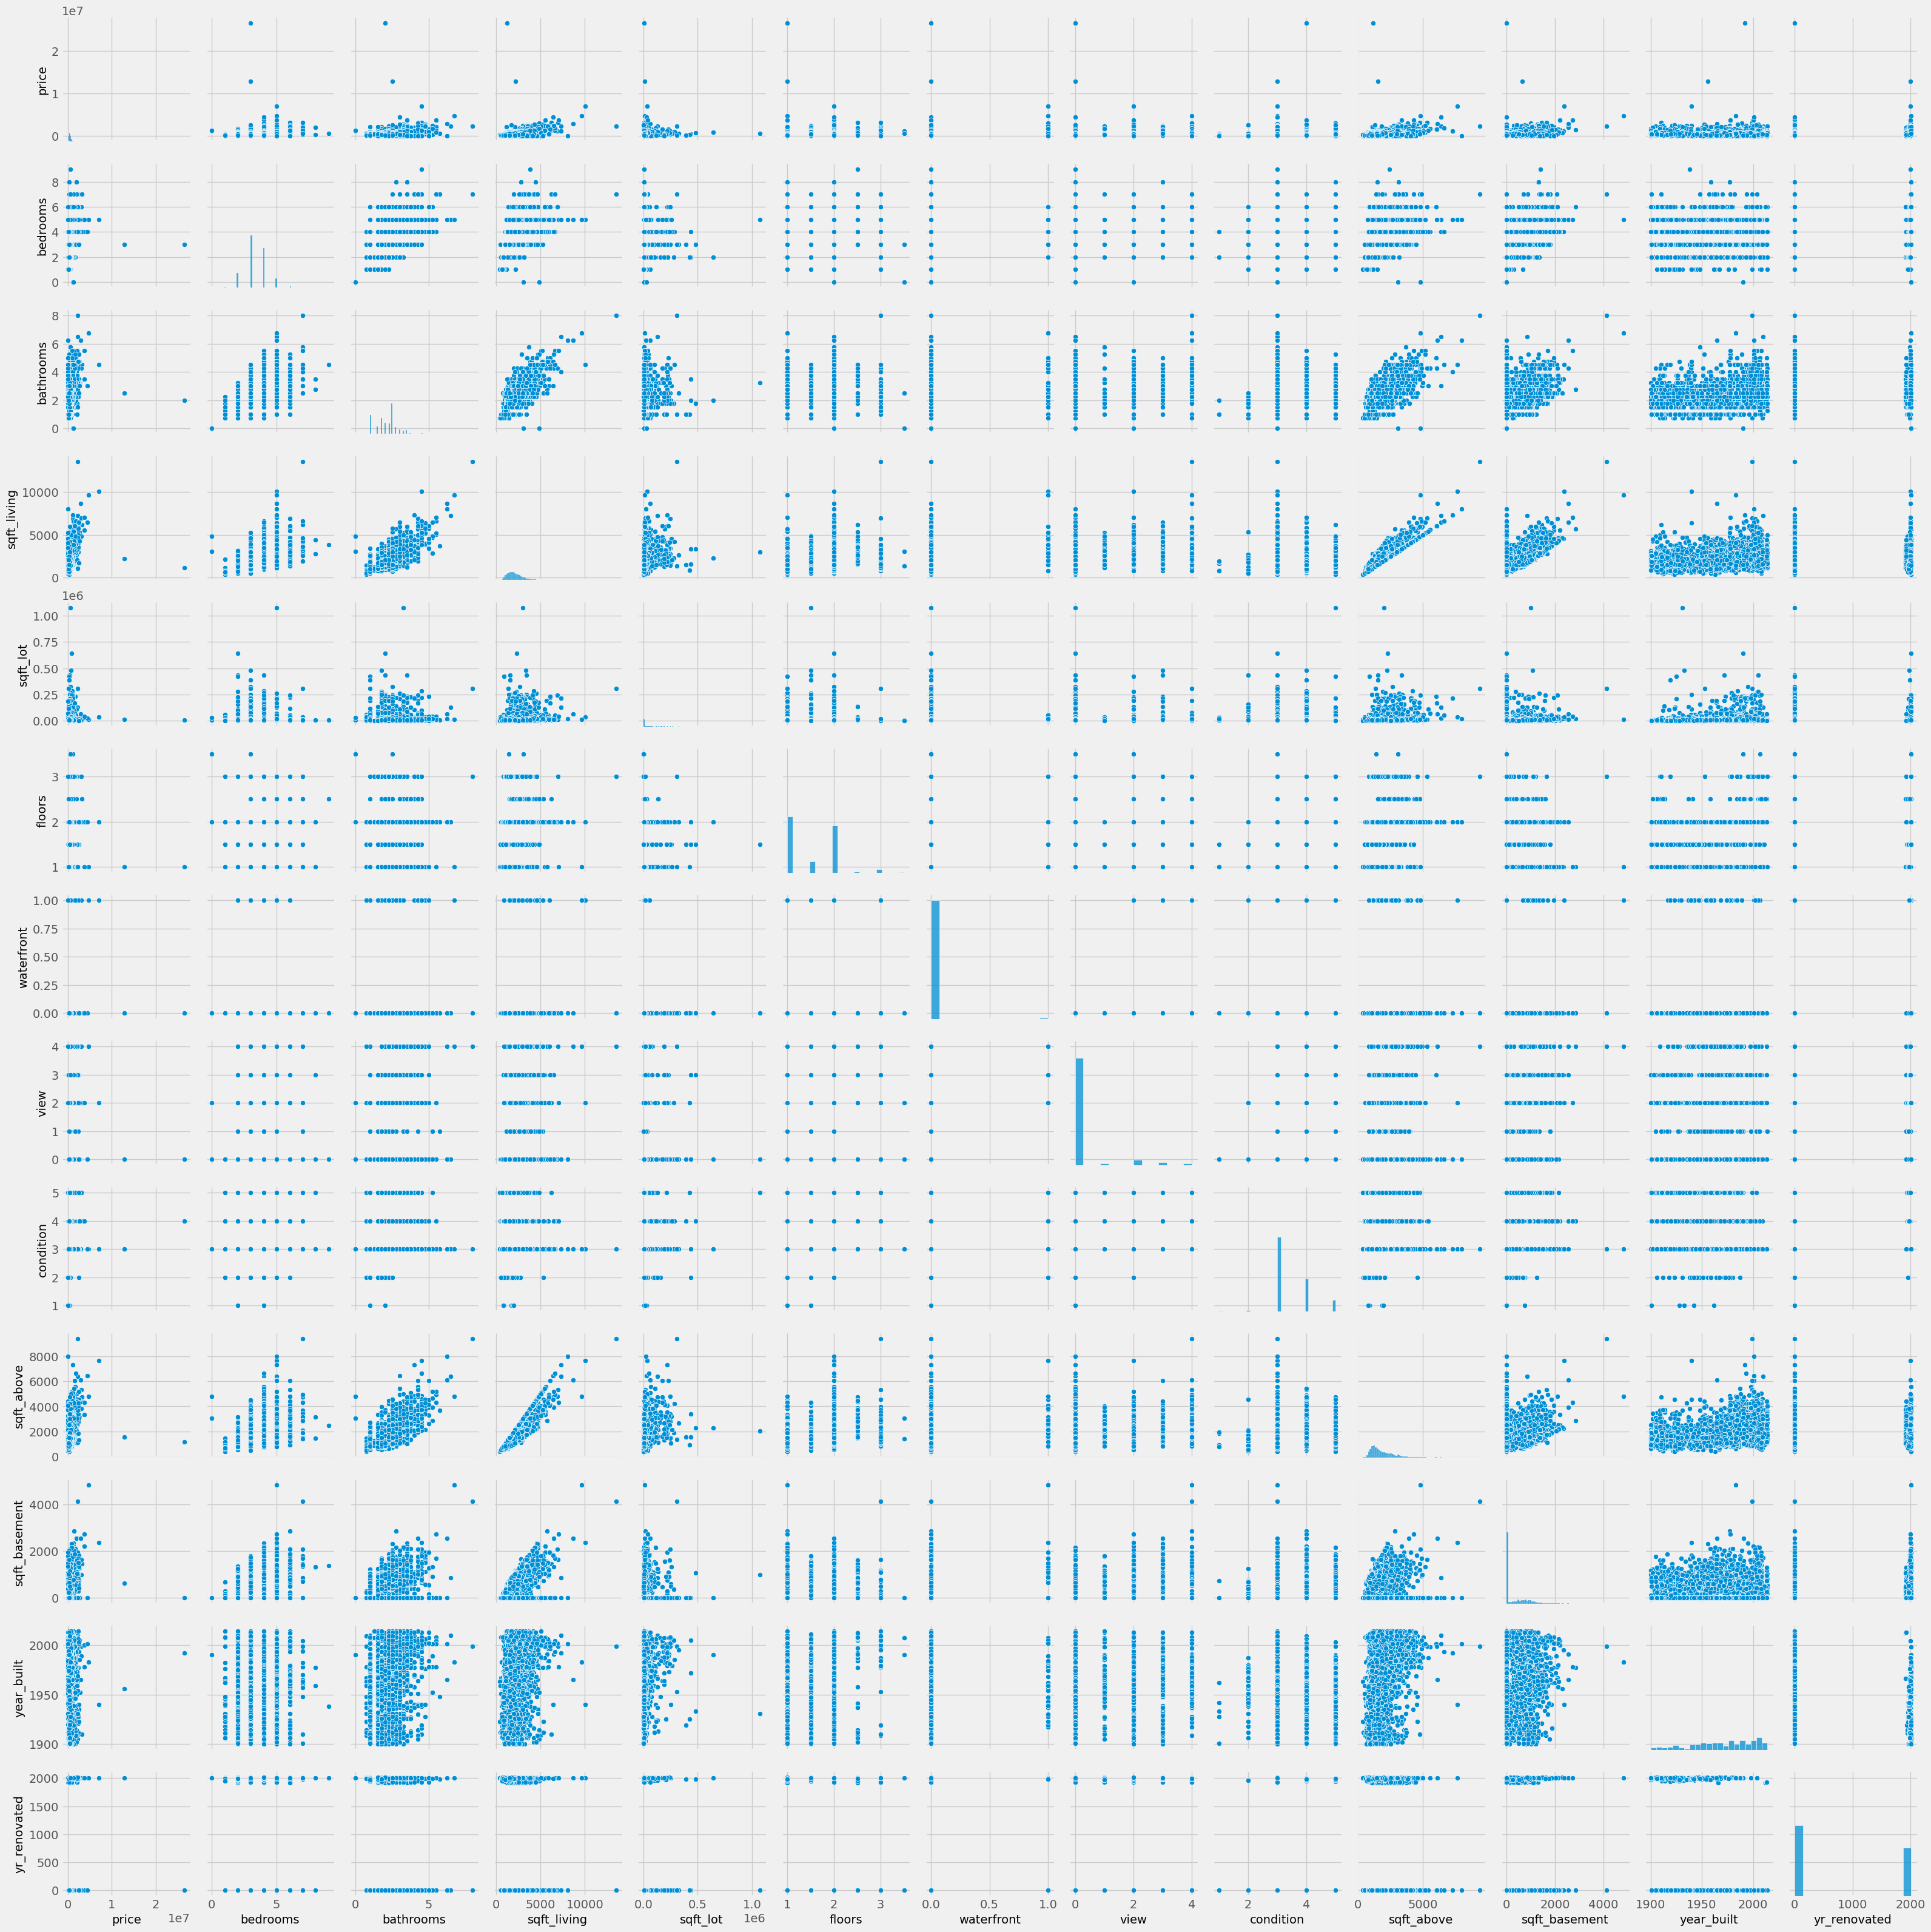

In [37]:
sns.pairplot(df)

C:\Users\skss\AppData\Local\Temp\ipykernel_5592\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

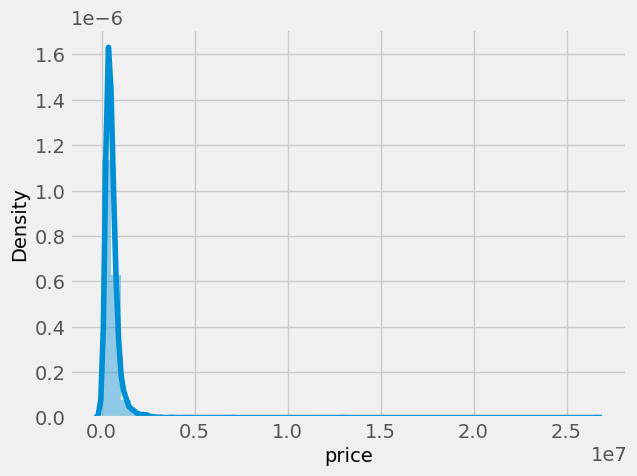

In [38]:
sns.distplot(df['price'])

In [39]:
list(set(df.dtypes.tolist()))

[dtype('int64'), dtype('<M8[ns]'), dtype('float64'), dtype('O')]

In [40]:
df_num = df.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,year_built,yr_renovated
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992


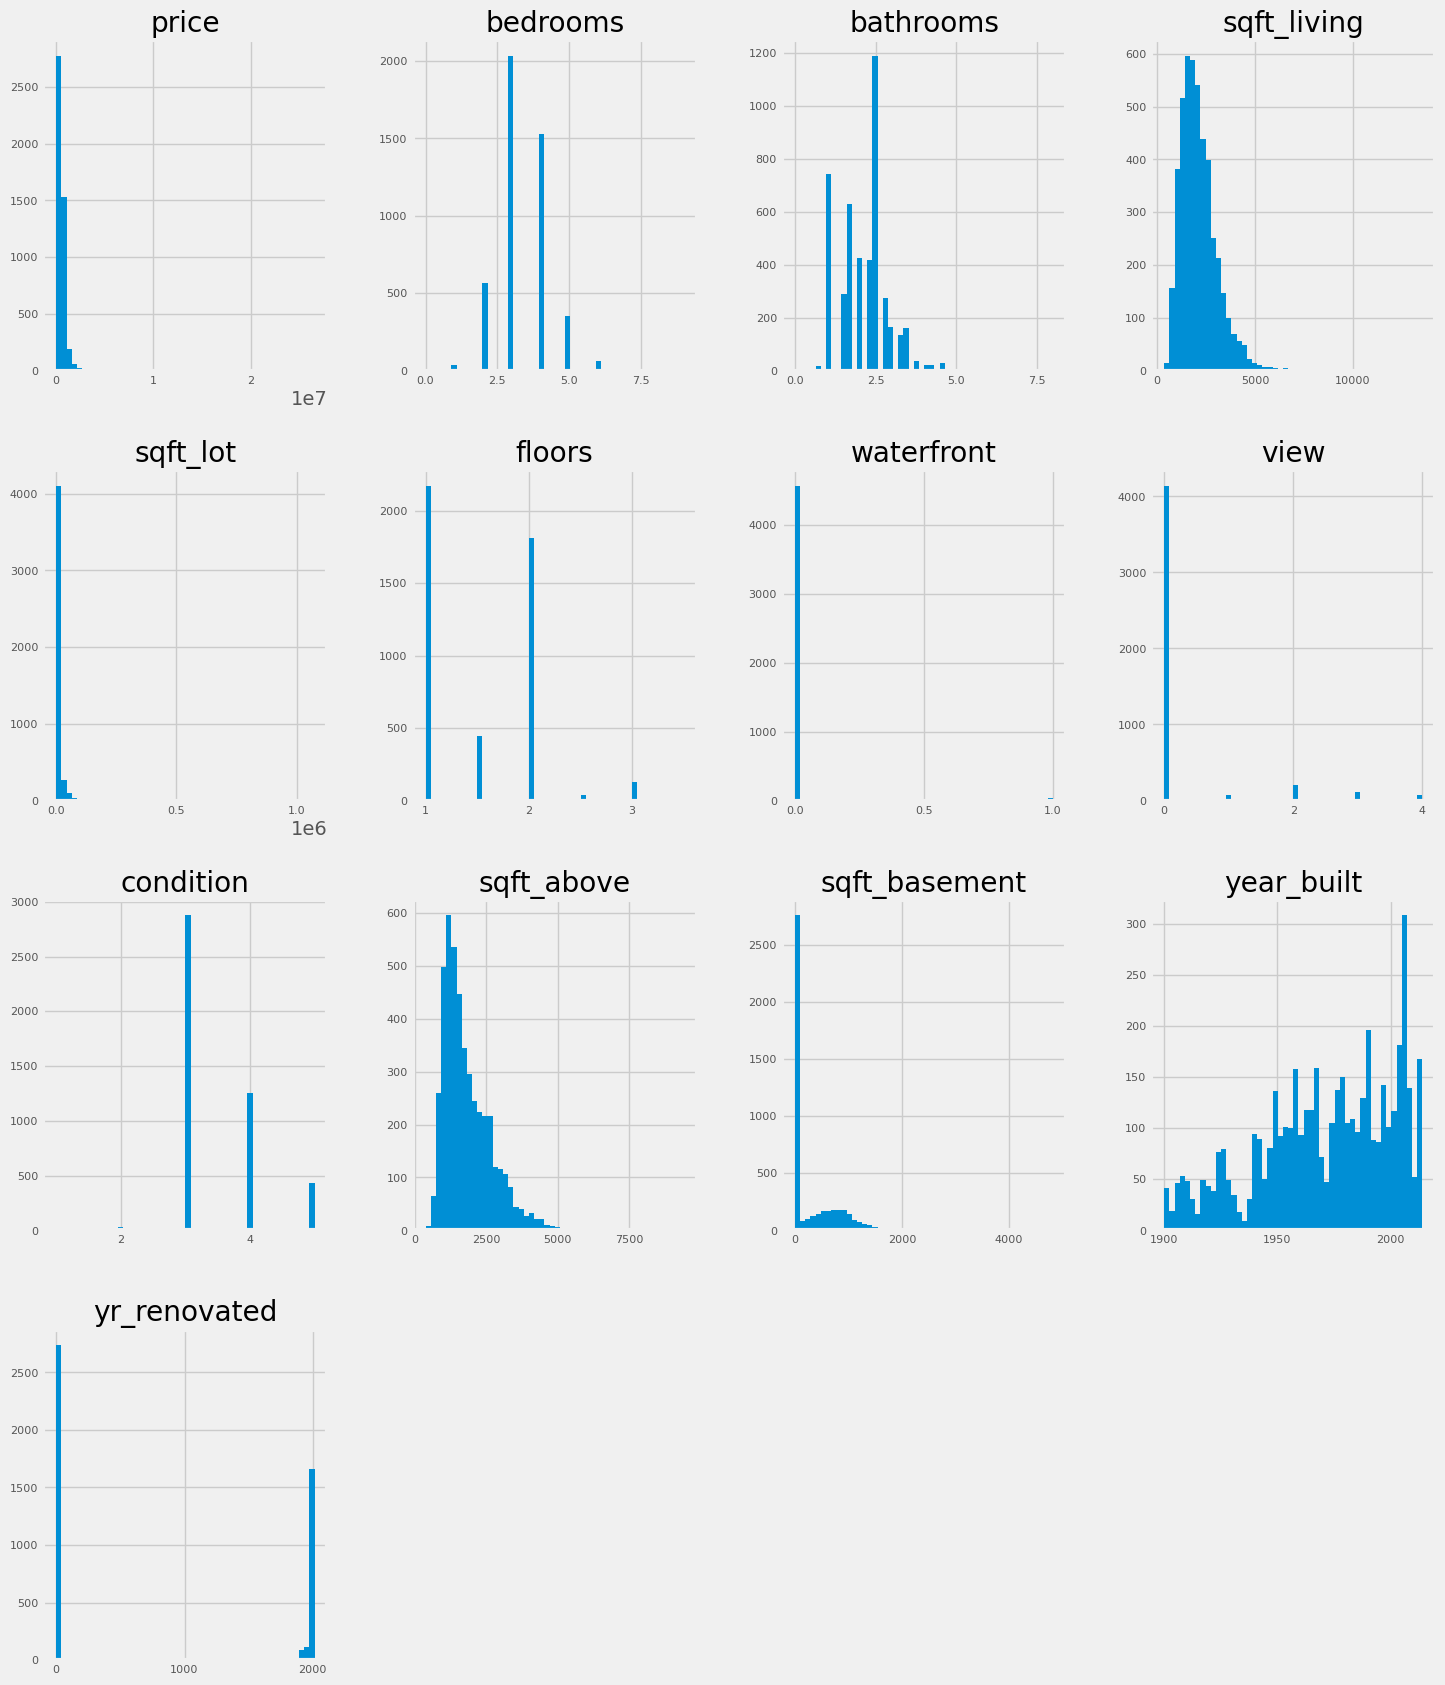

In [41]:
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

In [42]:
df.head(5)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,year_built,yr_renovated,street,city,statezip,country
0,2014-05-02,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [43]:
X = df[['bedrooms', 'bathrooms', 'sqft_living','floors', 'sqft_above']]

y = df['price']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [45]:
lm = LinearRegression()

NameError: name 'LinearRegression' is not defined

In [ ]:
lm.fit(X_train,y_train)

In [ ]:
print(lm.intercept_)

In [ ]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

In [ ]:
predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)

In [ ]:
from sklearn import metrics

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)


In [ ]:
print("x train: ",X_train.shape)
print("x test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)


# Applying regression models

# 1.Linear Regression

# 2.Ridge Regression

# 3.Lasso Regression

# 4.Random Forest Regression

# 5.Gradient Boosting regression

In [ ]:
CV = []
R2_train = []
R2_test = []

def House_price_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

# Linear Regression 

In [ ]:
lr = LinearRegression()
House_price_model(lr,"Linear_regressor.pkl")

# Ridge

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import RandomizedSearchCV

# Creating Ridge model object
rg = Ridge()
# range of alpha 
alpha = np.logspace(-3,3,num=14)

# Creating RandomizedSearchCV to find the best estimator of hyperparameter
rg_rs = RandomizedSearchCV(estimator = rg, param_distributions = dict(alpha=alpha))

House_price_model(rg_rs,"ridge.pkl")

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import RandomizedSearchCV

ls = Lasso()
alpha = np.logspace(-3,3,num=14) # range for alpha

ls_rs = RandomizedSearchCV(estimator = ls, param_distributions = dict(alpha=alpha))
House_price_model(ls_rs,"lasso.pkl")

# Random Forest

In [ ]:
rf = RandomForestRegressor()

# Number of trees in Random forest
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

rf_rs = RandomizedSearchCV(estimator = rf, param_distributions = param_grid)
House_price_model(rf_rs,'random_forest.pkl')

In [ ]:
print(rf_rs.best_estimator_)

# Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV

gb = GradientBoostingRegressor()

# Rate at which correcting is being made
learning_rate = [0.001, 0.01, 0.1, 0.2]
# Number of trees in Gradient boosting
n_estimators=list(range(500,1000,100))
# Maximum number of levels in a tree
max_depth=list(range(4,9,4))
# Minimum number of samples required to split an internal node
min_samples_split=list(range(4,9,2))
# Minimum number of samples required to be at a leaf node.
min_samples_leaf=[1,2,5,7]
# Number of fearures to be considered at each split
max_features=['auto','sqrt']

# Hyperparameters dict
param_grid = {"learning_rate":learning_rate,
              "n_estimators":n_estimators,
              "max_depth":max_depth,
              "min_samples_split":min_samples_split,
              "min_samples_leaf":min_samples_leaf,
              "max_features":max_features}

gb_rs = RandomizedSearchCV(estimator = gb, param_distributions = param_grid)
House_price_model(gb_rs,"gradient_boosting.pkl")

In [ ]:
Technique = ["LinearRegression","Ridge","Lasso","RandomForestRegressor","GradientBoostingRegressor"]
results=pd.DataFrame({'Model': Technique,'R Squared(Train)': R2_train,'R Squared(Test)': R2_test,'CV score mean(Train)': CV})
display(results)